In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# loading our dataframes
#we will be using df_f for our Financial Fraud Dataset sample. 

df_f = pd.read_csv('../TLAB 2 PHASE 2/PS_20174392719_1491204439457_log.csv')

randomsample= df_f.sample(n=500000)

#Let's figure out what do we have in our dataframes 

#First let's see what is the shappe of each dataframe 
print("Fraud Dataset:", randomsample.shape)

Fraud Dataset: (500000, 11)


In [2]:
#let's see the type of columns 

print("Columns of Fraud Dataset:", randomsample.columns)

Columns of Fraud Dataset: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [3]:
#let's see if we are missing any data 
randomsample.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
#good news! no data is missing, let's try to get our basic stat info from dataframes 
print( randomsample.describe()) 

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  500000.000000  5.000000e+05   5.000000e+05    5.000000e+05   
mean      243.586268  1.797740e+05   8.317169e+05    8.530405e+05   
std       142.135843  6.025804e+05   2.882289e+06    2.918254e+06   
min         1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%       156.000000  1.342962e+04   0.000000e+00    0.000000e+00   
50%       240.000000  7.510871e+04   1.406076e+04    0.000000e+00   
75%       335.000000  2.084565e+05   1.073094e+05    1.432972e+05   
max       741.000000  7.117248e+07   4.958504e+07    4.143236e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    5.000000e+05    5.000000e+05  500000.000000   500000.000000  
mean     1.107831e+06    1.232361e+06       0.001328        0.000002  
std      3.441609e+06    3.716625e+06       0.036418        0.001414  
min      0.000000e+00    0.000000e+00       0.000000        0.000000  
25%      0.000000e+00  

In [13]:
randomsample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 3229174 to 2909262
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 45.8+ MB


In [16]:
randomsample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3229174,250,CASH_OUT,428211.50,C852787516,275.0,0.0,C588482337,11436987.14,11865198.64,0,0
4169244,304,CASH_OUT,564965.76,C1882364513,9910.0,0.0,C1538478284,0.00,564965.76,0,0
1667133,158,CASH_OUT,82262.35,C2139878344,0.0,0.0,C1447446716,286113.59,368375.95,0,0
4407541,322,CASH_OUT,164168.76,C1542165095,0.0,0.0,C915563874,3173264.10,3337432.87,0,0
1900522,165,PAYMENT,15122.95,C193798706,11545.0,0.0,M227423126,0.00,0.00,0,0


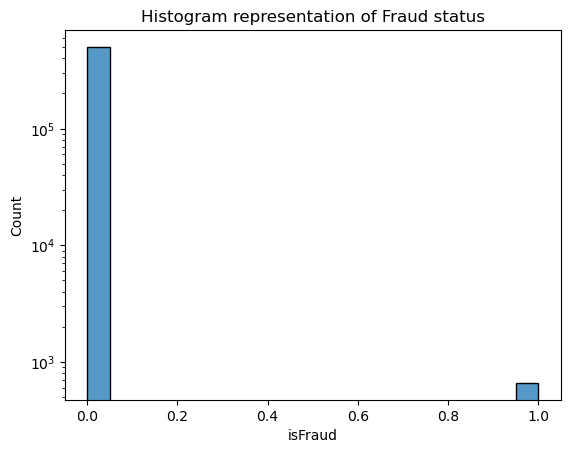

In [14]:
#let's visualize how many are marked Flagged based off of the naive model
plt.title('Histogram representation of Fraud status')
sns.histplot(randomsample['isFraud'])
plt.yscale("log")


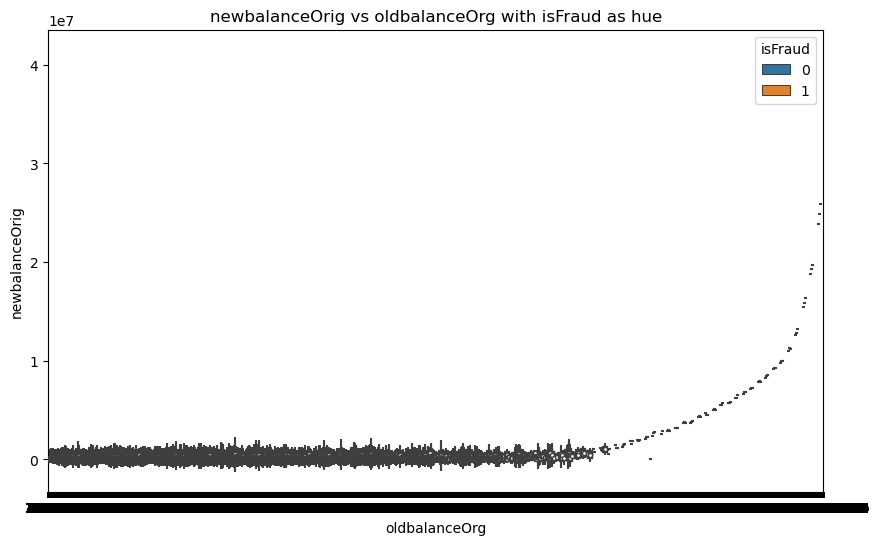

In [17]:
# Bivariate analysis with hue - using a mix of scatter plots, bar plots, and box plots
def plot_bivariate_hue(df, x, y, hue, plot_type="scatter",palette=None):
    plt.figure(figsize=(10, 6))
    if plot_type == "scatter":
        sns.scatterplot(data=df, x=x, y=y, hue=hue, palette=None)
    elif plot_type == "bar":
        sns.barplot(data=df, x=x, y=y, hue=hue, palette=None)
    elif plot_type == "box":
        sns.boxplot(data=df, x=x, y=y, hue=hue, palette=None)
    elif plot_type == "violin":
        sns.violinplot(data=df, x=x, y=y, hue=hue, palette=None)
    plt.title(f'{y} vs {x} with {hue} as hue')
    plt.show()

# Scatter plot with hue (for numerical variables)
plot_bivariate_hue(randomsample, x='oldbalanceOrg', y='newbalanceOrig',plot_type="violin",hue="isFraud",palette= "Set2")
# Box plot with hue (for mixed variables)
# plot_bivariate_hue(data, 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',  plot_type="box")

# Bar plot with hue (for categorical variables)
# plot_bivariate_hue(data, 'amount', 'isFraud', 'isFlaggedFraud', plot_type="bar")


In [ ]:
plot_bivariate_hue(data, 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',  plot_type="box")

: 

In [ ]:
python get-pip.py

: 

In [ ]:
'/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python -m pip install ipykernel -U --user --force-reinstall'

: 